In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
import sklearn
from sklearn.model_selection import train_test_split

tes = 'https://drive.google.com/uc?export=download&id=1M8Ddj9EmkcQ9FE9urYz80kYNKwmQ3KnY'
df = pd.read_csv(tes)
df.head(10)

,url,price_in_rp,title,address,district,city,lat,long,facilities,property_type,...,electricity,maid_bedrooms,maid_bathrooms,floors,building_age,year_built,property_condition,building_orientation,garages,furnishing
0,https://www.rumah123.com/properti/bekasi/hos11...,2.990000e+09,Rumah cantik Sumarecon Bekasi\nLingkungan asri...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Tempat Jemuran, Jalur Telepon, Taman, Taman",rumah,...,4400 mah,0.0,1.0,2.0,5.0,2017.0,bagus,NaN,0.0,unfurnished
1,https://www.rumah123.com/properti/bekasi/hos10...,1.270000e+09,"Rumah Kekinian, Magenta Summarecon Bekasi","Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,Taman,rumah,...,2200 mah,0.0,0.0,2.0,NaN,NaN,bagus,NaN,0.0,NaN
2,https://www.rumah123.com/properti/bekasi/hos10...,1.950000e+09,Rumah Cantik 2 Lantai Cluster Bluebell Summare...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jogging Track, Kolam Renang, Masjid, Taman,...",rumah,...,2200 mah,1.0,1.0,2.0,NaN,NaN,bagus,NaN,1.0,unfurnished
3,https://www.rumah123.com/properti/bekasi/hos10...,3.300000e+09,Rumah Mewah 2Lantai L10x18 C di Cluster VERNON...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jalur Telepon, Jogging Track, Track Lari, K...",rumah,...,3500 mah,1.0,1.0,2.0,6.0,2016.0,bagus sekali,utara,2.0,unfurnished
4,https://www.rumah123.com/properti/bekasi/hos10...,4.500000e+09,"Rumah Hoek di Cluster Maple Summarecon Bekasi,...","Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jogging Track, Kolam Renang, Taman, Jalur Te...",rumah,...,3500 mah,1.0,1.0,2.0,9.0,2013.0,bagus,utara,1.0,unfurnished
5,https://www.rumah123.com/properti/bekasi/hos11...,2.700000e+09,"Rumah Siap Huni di Cluster Acasia, Summarecon ...","Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jalur Telepon, Taman, Keamanan, Kolam Renang",rumah,...,3500 mah,1.0,1.0,2.0,9.0,2013.0,bagus,selatan,1.0,semi furnished
6,https://www.rumah123.com/properti/bekasi/hos10...,2.350000e+09,Rumah di Cluster Maple Summarecon Bekasi,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Keamanan, Kolam Renang",rumah,...,4400 mah,0.0,0.0,2.0,NaN,NaN,NaN,utara,1.0,NaN
7,https://www.rumah123.com/properti/bekasi/hos10...,4.500000e+09,Rumah Cluster Lotus Summarecon Bekasi,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Keamanan, Kolam Renang",rumah,...,3500 mah,1.0,1.0,2.0,NaN,NaN,NaN,selatan,1.0,NaN
8,https://www.rumah123.com/properti/bekasi/hos11...,2.900000e+09,Rumah Cluster Palm Summarecon Bekasi,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,Kitchen Set,rumah,...,4400 mah,3.0,1.0,2.0,NaN,NaN,NaN,selatan,0.0,semi furnished
9,https://www.rumah123.com/properti/bekasi/hos11...,2.700000e+09,Rumah Cluster Acacia Summarecon Bekasi,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Keamanan 24 jam, Kolam Renang",rumah,...,3500 mah,1.0,1.0,2.0,NaN,NaN,NaN,selatan,1.0,semi furnished


In [2]:
df.describe(include='all')

,url,price_in_rp,title,address,district,city,lat,long,facilities,property_type,...,electricity,maid_bedrooms,maid_bathrooms,floors,building_age,year_built,property_condition,building_orientation,garages,furnishing
count,3553,3.553000e+03,3553,3553,3553,3553,3553.000000,3553.000000,3553,3552,...,3553,3553.000000,3553.000000,3547.000000,2108.000000,2108.000000,3307,1906,3553.000000,3166
unique,3552,NaN,3342,397,380,9,NaN,NaN,2024,1,...,30,NaN,NaN,NaN,NaN,NaN,7,8,NaN,4
top,https://www.rumah123.com/properti/tangerang/ho...,NaN,"Sentul City,bogor","Sentul City, Bogor",Sentul City,Bogor,NaN,NaN,"Keamanan, Taman",rumah,...,2200 mah,NaN,NaN,NaN,NaN,NaN,bagus,selatan,NaN,unfurnished
freq,2,NaN,21,282,282,881,NaN,NaN,400,3552,...,1390,NaN,NaN,NaN,NaN,NaN,1437,562,NaN,2066
mean,NaN,4.191685e+09,NaN,NaN,NaN,NaN,-6.324721,106.792881,NaN,NaN,...,NaN,0.496482,0.370391,1.764590,3.880930,2018.137097,NaN,NaN,0.708978,NaN
std,NaN,1.375067e+10,NaN,NaN,NaN,NaN,0.129245,0.172159,NaN,NaN,...,NaN,0.685723,0.536024,0.637349,7.603708,7.641448,NaN,NaN,1.311879,NaN
min,NaN,4.200000e+07,NaN,NaN,NaN,NaN,-6.894828,106.402315,NaN,NaN,...,NaN,0.000000,0.000000,1.000000,0.000000,1870.000000,NaN,NaN,0.000000,NaN
25%,NaN,8.000000e+08,NaN,NaN,NaN,NaN,-6.397933,106.687295,NaN,NaN,...,NaN,0.000000,0.000000,1.000000,0.000000,2016.000000,NaN,NaN,0.000000,NaN
50%,NaN,1.500000e+09,NaN,NaN,NaN,NaN,-6.300733,106.799954,NaN,NaN,...,NaN,0.000000,0.000000,2.000000,1.000000,2021.000000,NaN,NaN,0.000000,NaN
75%,NaN,3.590000e+09,NaN,NaN,NaN,NaN,-6.231754,106.874766,NaN,NaN,...,NaN,1.000000,1.000000,2.000000,6.000000,2022.000000,NaN,NaN,1.000000,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3553 entries, 0 to 3552
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   url                   3553 non-null   object 
 1   price_in_rp           3553 non-null   float64
 2   title                 3553 non-null   object 
 3   address               3553 non-null   object 
 4   district              3553 non-null   object 
 5   city                  3553 non-null   object 
 6   lat                   3553 non-null   float64
 7   long                  3553 non-null   float64
 8   facilities            3553 non-null   object 
 9   property_type         3552 non-null   object 
 10  ads_id                3549 non-null   object 
 11  bedrooms              3519 non-null   float64
 12  bathrooms             3524 non-null   float64
 13  land_size_m2          3551 non-null   float64
 14  building_size_m2      3551 non-null   float64
 15  carports             

In [4]:
df.isnull().sum()

url                        0
price_in_rp                0
title                      0
address                    0
district                   0
city                       0
lat                        0
long                       0
facilities                 0
property_type              1
ads_id                     4
bedrooms                  34
bathrooms                 29
land_size_m2               2
building_size_m2           2
carports                   0
certificate              141
electricity                0
maid_bedrooms              0
maid_bathrooms             0
floors                     6
building_age            1445
year_built              1445
property_condition       246
building_orientation    1647
garages                    0
furnishing               387
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.dropna()

,url,price_in_rp,title,address,district,city,lat,long,facilities,property_type,...,electricity,maid_bedrooms,maid_bathrooms,floors,building_age,year_built,property_condition,building_orientation,garages,furnishing
3,https://www.rumah123.com/properti/bekasi/hos10...,3.300000e+09,Rumah Mewah 2Lantai L10x18 C di Cluster VERNON...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jalur Telepon, Jogging Track, Track Lari, K...",rumah,...,3500 mah,1.0,1.0,2.0,6.0,2016.0,bagus sekali,utara,2.0,unfurnished
4,https://www.rumah123.com/properti/bekasi/hos10...,4.500000e+09,"Rumah Hoek di Cluster Maple Summarecon Bekasi,...","Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jogging Track, Kolam Renang, Taman, Jalur Te...",rumah,...,3500 mah,1.0,1.0,2.0,9.0,2013.0,bagus,utara,1.0,unfurnished
5,https://www.rumah123.com/properti/bekasi/hos11...,2.700000e+09,"Rumah Siap Huni di Cluster Acasia, Summarecon ...","Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jalur Telepon, Taman, Keamanan, Kolam Renang",rumah,...,3500 mah,1.0,1.0,2.0,9.0,2013.0,bagus,selatan,1.0,semi furnished
13,https://www.rumah123.com/properti/bekasi/hos97...,2.350000e+09,MURAH RUMAH 2 LANTAI CLUSTER LOTUS 8X18 PREMIU...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jogging Track, Kolam Renang, Taman, Jalur Te...",rumah,...,2200 mah,1.0,1.0,2.0,8.0,2014.0,bagus,utara,1.0,unfurnished
15,https://www.rumah123.com/properti/bekasi/hos11...,2.700000e+09,Rumah Adem Pojok Bluebell 7x17 Premium Hoek Su...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Tempat Jemuran, Track Lari, One Gate System, ...",rumah,...,3500 mah,1.0,1.0,3.0,7.0,2015.0,bagus,utara,1.0,unfurnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3547,https://www.rumah123.com/properti/tangerang/ho...,6.850000e+08,Rumah Mewah Murah 2 Lantai Include Biaya Biaya...,"Babakan, Tangerang",Babakan,Tangerang,-6.190893,106.635970,"Akses Parkir, Masjid, Keamanan, Jogging Tra...",rumah,...,1300 mah,0.0,0.0,2.0,0.0,2022.0,baru,timur,0.0,unfurnished
3549,https://www.rumah123.com/properti/tangerang/ho...,7.850000e+08,Rumah Modern Asri dan Nyaman Bebas Banjir Loka...,"Lengkong Kulon, Tangerang",Lengkong Kulon,Tangerang,-6.283454,106.638775,"Masjid, Keamanan, Jogging Track, Taman, Tem...",rumah,...,1300 mah,0.0,0.0,2.0,0.0,2022.0,baru,utara,0.0,unfurnished
3550,https://www.rumah123.com/properti/tangerang/ho...,7.550000e+08,Rumah Mewah Murah 2 Lantai Gratis Biaya Biaya ...,"Lengkong Kulon, Tangerang",Lengkong Kulon,Tangerang,-6.283454,106.638775,"Keamanan, Taman, Jogging Track, Tempat Jemur...",rumah,...,1300 mah,0.0,0.0,2.0,0.0,2022.0,baru,utara,0.0,unfurnished
3551,https://www.rumah123.com/properti/tangerang/ho...,8.000000e+08,Rumah 2 Lantai Dekat Perkantoran BSD City AEON...,"BSD Provance Parkland, Tangerang",BSD Provance Parkland,Tangerang,-6.288237,106.665859,"Tempat Jemuran, Keamanan, Keamanan 24 jam, Was...",rumah,...,2200 mah,0.0,0.0,2.0,0.0,2022.0,baru,selatan,0.0,furnished


In [7]:
df.drop(columns=['title','ads_id','facilities' , 'property_type', 'floors', 'lat', 'long', 'district', 'address', 'url', 'building_orientation', 'year_built', 'building_age'], inplace=True)

In [8]:
df['electricity'] = df['electricity'].str.extract(r'(\d+)', expand=False).astype(float)

In [9]:
df.head()

,price_in_rp,city,bedrooms,bathrooms,land_size_m2,building_size_m2,carports,certificate,electricity,maid_bedrooms,maid_bathrooms,property_condition,garages,furnishing
0,2.990000e+09,Bekasi,4.0,4.0,239.0,272.0,0.0,shm - sertifikat hak milik,4400.0,0.0,1.0,bagus,0.0,unfurnished
1,1.270000e+09,Bekasi,3.0,2.0,55.0,69.0,1.0,hgb - hak guna bangunan,2200.0,0.0,0.0,bagus,0.0,NaN
2,1.950000e+09,Bekasi,3.0,3.0,119.0,131.0,1.0,hgb - hak guna bangunan,2200.0,1.0,1.0,bagus,1.0,unfurnished
3,3.300000e+09,Bekasi,3.0,3.0,180.0,174.0,0.0,shm - sertifikat hak milik,3500.0,1.0,1.0,bagus sekali,2.0,unfurnished
4,4.500000e+09,Bekasi,4.0,3.0,328.0,196.0,2.0,shm - sertifikat hak milik,3500.0,1.0,1.0,bagus,1.0,unfurnished


In [10]:
df.isnull().sum()

price_in_rp             0
city                    0
bedrooms               34
bathrooms              29
land_size_m2            2
building_size_m2        2
carports                0
certificate           141
electricity           294
maid_bedrooms           0
maid_bathrooms          0
property_condition    246
garages                 0
furnishing            387
dtype: int64

In [11]:
categorical_cols = ['furnishing', 'property_condition', 'certificate', 'electricity']

for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

num_cols = ['bedrooms', 'bathrooms', 'land_size_m2', 'building_size_m2']

for cil in num_cols:
    df[cil].fillna(df[cil].median(), inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_25576\3053154821.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_25576\3053154821.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

In [12]:
df.isnull().sum()

price_in_rp           0
city                  0
bedrooms              0
bathrooms             0
land_size_m2          0
building_size_m2      0
carports              0
certificate           0
electricity           0
maid_bedrooms         0
maid_bathrooms        0
property_condition    0
garages               0
furnishing            0
dtype: int64

In [13]:
df.describe(include='all')

,price_in_rp,city,bedrooms,bathrooms,land_size_m2,building_size_m2,carports,certificate,electricity,maid_bedrooms,maid_bathrooms,property_condition,garages,furnishing
count,3.553000e+03,3553,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553,3553.000000,3553.000000,3553.000000,3553,3553.000000,3553
unique,NaN,9,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,7,NaN,4
top,NaN,Bogor,NaN,NaN,NaN,NaN,NaN,shm - sertifikat hak milik,NaN,NaN,NaN,bagus,NaN,unfurnished
freq,NaN,881,NaN,NaN,NaN,NaN,NaN,3142,NaN,NaN,NaN,1683,NaN,2453
mean,4.191685e+09,NaN,3.323389,2.619758,204.752322,186.545455,1.197861,NaN,3081.030115,0.496482,0.370391,NaN,0.708978,NaN
std,1.375067e+10,NaN,2.659518,2.686055,402.021078,248.379819,1.114996,NaN,3136.708535,0.685723,0.536024,NaN,1.311879,NaN
min,4.200000e+07,NaN,1.000000,1.000000,12.000000,1.000000,0.000000,NaN,450.000000,0.000000,0.000000,NaN,0.000000,NaN
25%,8.000000e+08,NaN,2.000000,2.000000,75.000000,66.000000,1.000000,NaN,2200.000000,0.000000,0.000000,NaN,0.000000,NaN
50%,1.500000e+09,NaN,3.000000,2.000000,108.000000,112.000000,1.000000,NaN,2200.000000,0.000000,0.000000,NaN,0.000000,NaN
75%,3.590000e+09,NaN,4.000000,3.000000,192.000000,208.000000,2.000000,NaN,3500.000000,1.000000,1.000000,NaN,1.000000,NaN


In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
kolom_encode = ['city', 'certificate', 'property_condition', 'furnishing']
for col in kolom_encode:
  df[col] = le.fit_transform(df[col])

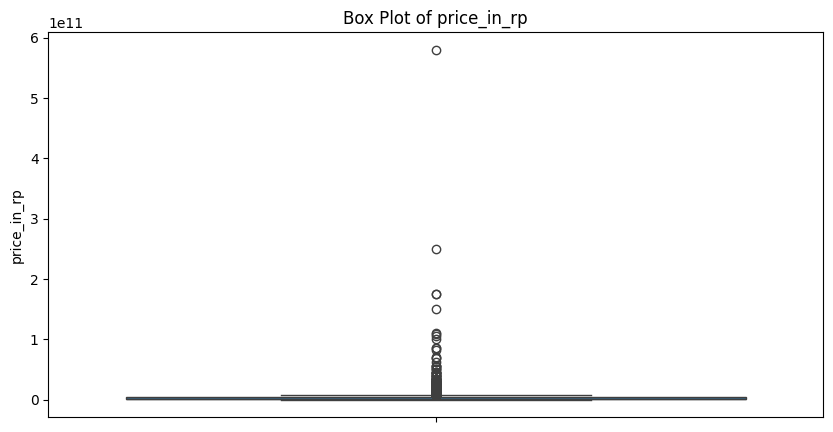

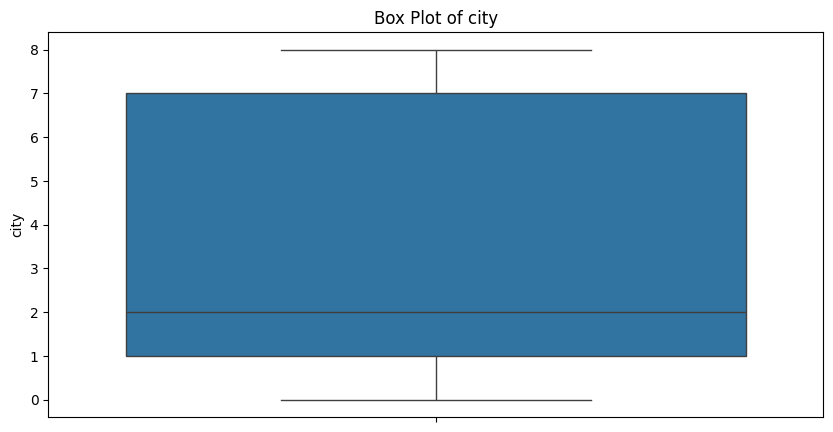

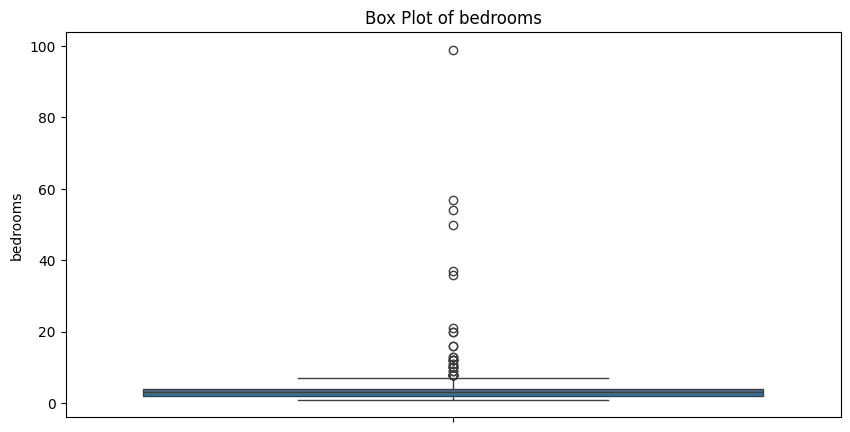

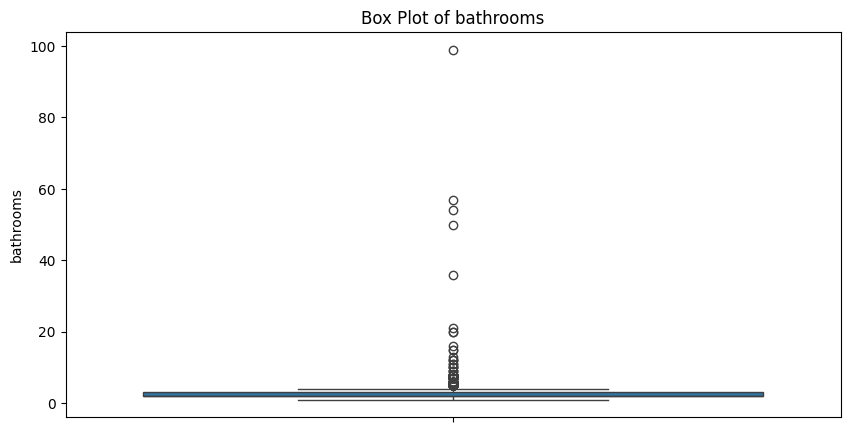

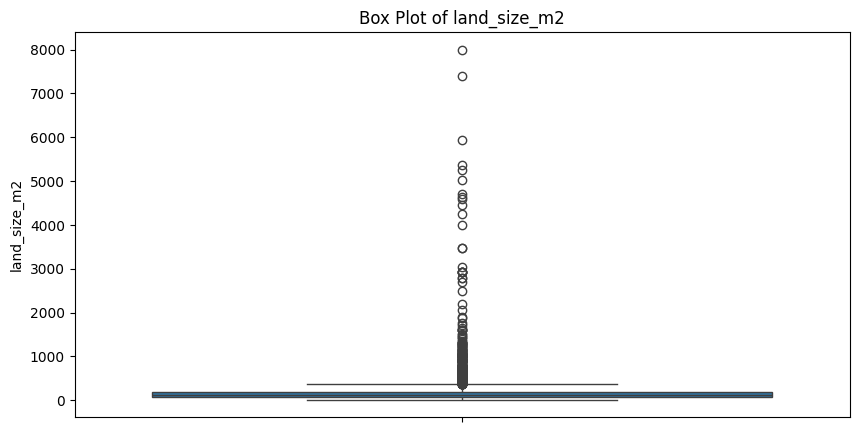

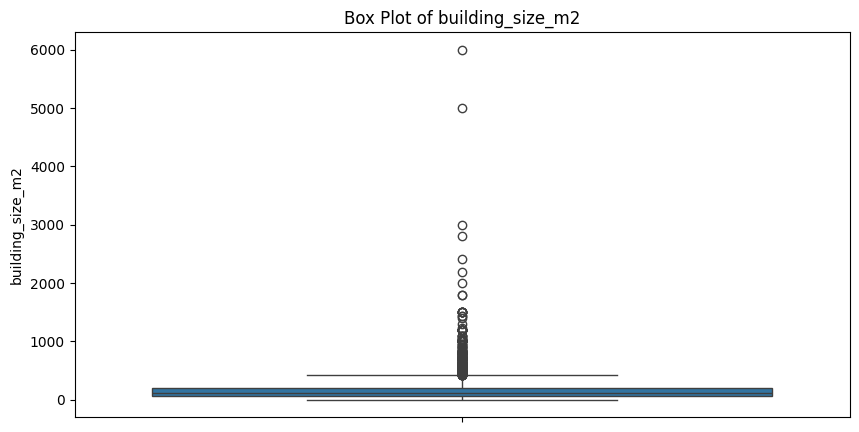

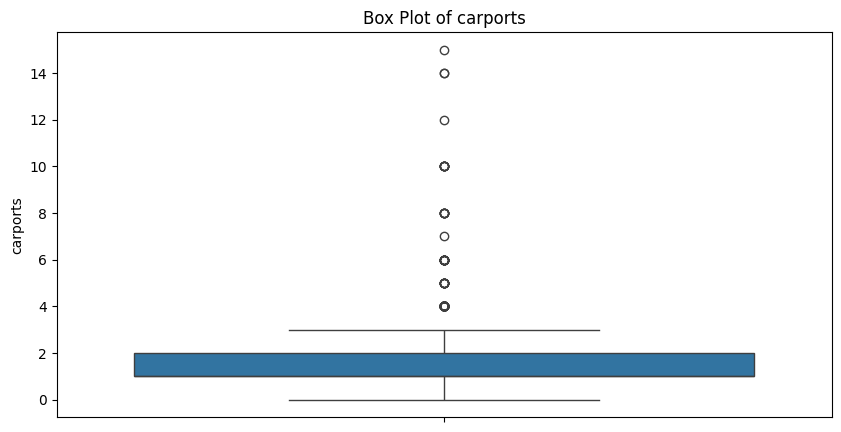

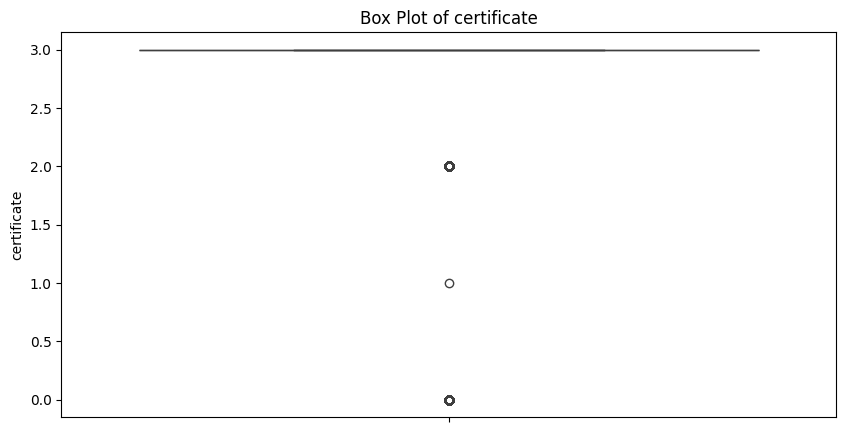

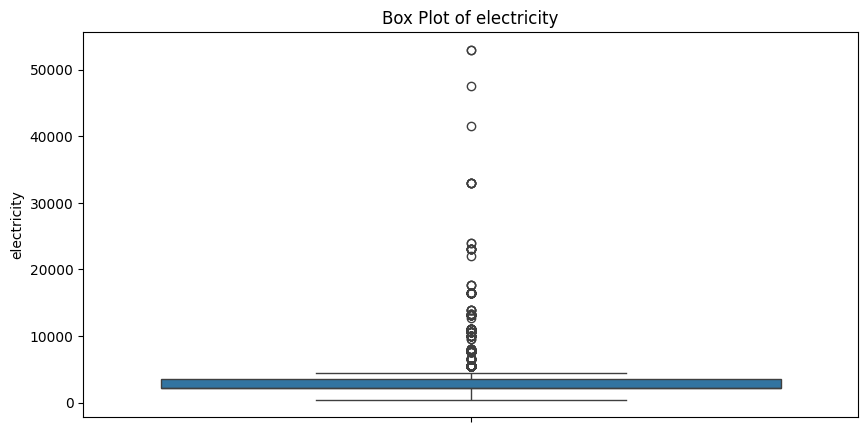

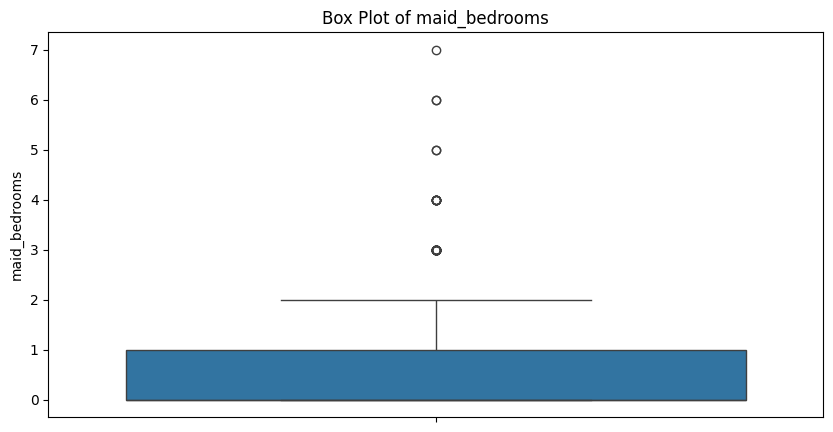

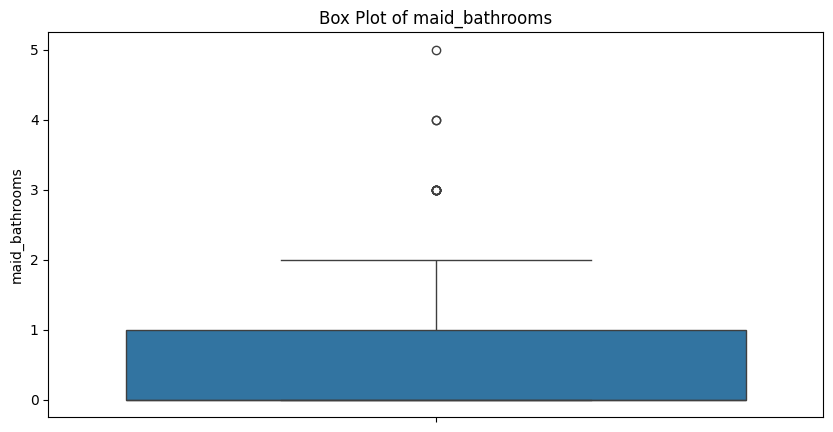

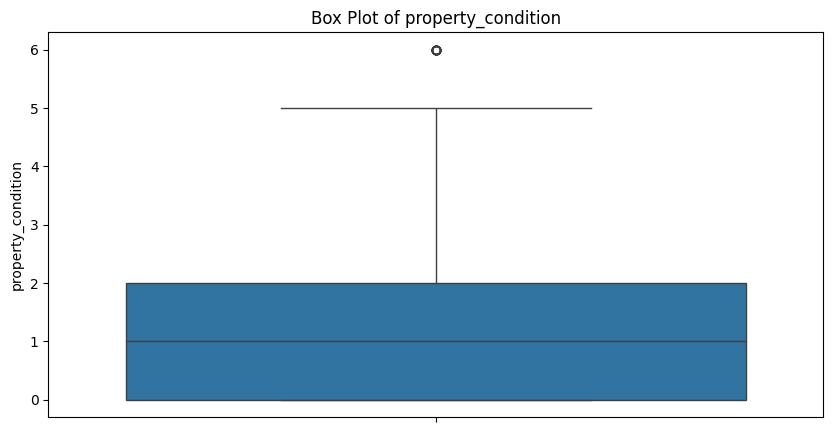

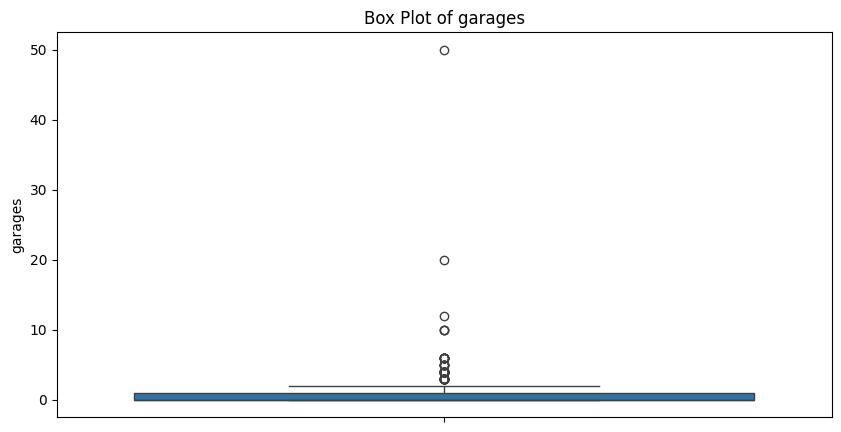

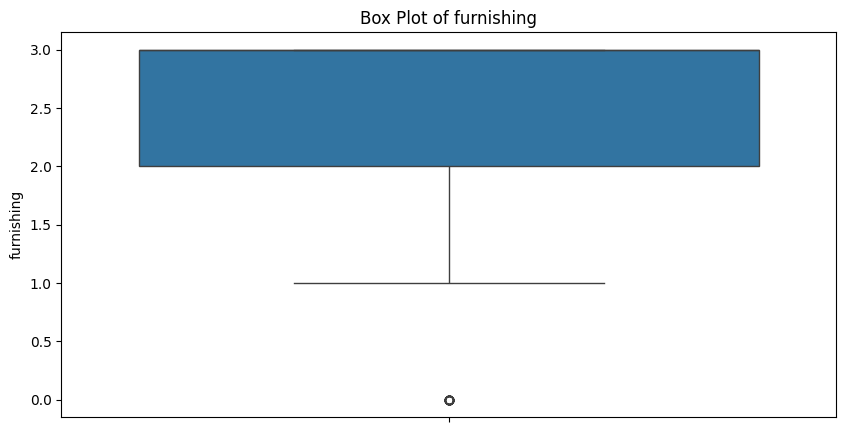

In [15]:
# Mencari Outliers
import seaborn as sns
for feature in df:
  plt.figure(figsize=(10, 5))
  sns.boxplot(df[feature])
  plt.title(f'Box Plot of {feature}')
  plt.show()

In [16]:
# Membuat copyan dataset sebelum melihat perbedaannya
df_original = df.copy()

In [17]:
# Log-Transform untuk mengatasi right skewed
df['price_in_rp'] = np.log1p(df['price_in_rp'])

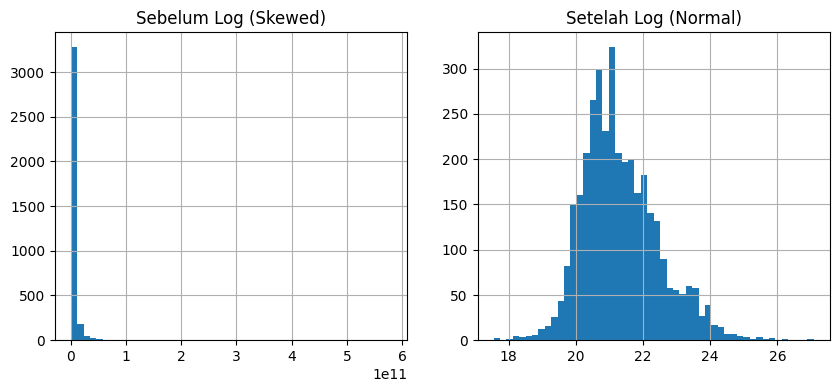

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))
df_original['price_in_rp'].hist(ax=ax[0], bins=50)
ax[0].set_title('Sebelum Log (Skewed)')
df['price_in_rp'].hist(ax=ax[1], bins=50)
ax[1].set_title('Setelah Log (Normal)')
plt.show()

In [19]:
# # Scaling dengan menggunakan RobustScaler agar tahan sama outlier karena ga di handling outliernya
# numeric_feature = df.select_dtypes(include=['number']).columns
# scaler = RobustScaler()
# df[numeric_feature] = scaler.fit_transform(df[numeric_feature])

In [20]:
# # Visualisasi Histogram Sebelum dan Sesudah Standarisasi
# for feature in numeric_feature:
#     plt.figure(figsize=(12, 5))

#     # Histogram Sebelum Standarisasi
#     plt.subplot(1, 2, 1)
#     sns.histplot(df_original[feature], kde=True)
#     plt.title(f'Sebelum Standarisasi: {feature}')
#     plt.xlabel(feature)
#     plt.ylabel('Frekuensi')

#     # Histogram Sesudah Standarisasi
#     plt.subplot(1, 2, 2)
#     sns.histplot(df[feature], kde=True) # Using df which has been scaled
#     plt.title(f'Sesudah Standarisasi: {feature}')
#     plt.xlabel(feature)
#     plt.ylabel('Frekuensi')

#     plt.tight_layout()
#     plt.show()

# EDA (Exploratory Data Analysis)

In [21]:
df.head(10)

,price_in_rp,city,bedrooms,bathrooms,land_size_m2,building_size_m2,carports,certificate,electricity,maid_bedrooms,maid_bathrooms,property_condition,garages,furnishing
0,21.818539,0,4.0,4.0,239.0,272.0,0.0,3,4400.0,0.0,1.0,0,0.0,3
1,20.962283,0,3.0,2.0,55.0,69.0,1.0,0,2200.0,0.0,0.0,0,0.0,3
2,21.391095,0,3.0,3.0,119.0,131.0,1.0,0,2200.0,1.0,1.0,0,1.0,3
3,21.917188,0,3.0,3.0,180.0,174.0,0.0,3,3500.0,1.0,1.0,1,2.0,3
4,22.227343,0,4.0,3.0,328.0,196.0,2.0,3,3500.0,1.0,1.0,0,1.0,3
5,21.716518,0,3.0,3.0,136.0,200.0,2.0,3,3500.0,1.0,1.0,0,1.0,2
6,21.577681,0,2.0,2.0,144.0,144.0,1.0,0,4400.0,0.0,0.0,0,1.0,3
7,22.227343,0,4.0,4.0,216.0,250.0,2.0,0,3500.0,1.0,1.0,0,1.0,3
8,21.787977,0,3.0,3.0,200.0,152.0,2.0,3,4400.0,3.0,1.0,0,0.0,2
9,21.716518,0,3.0,3.0,136.0,200.0,1.0,3,3500.0,1.0,1.0,0,1.0,2


In [22]:
# Memeriksa kembali missing value pada dataset yang akan digunakan
missing_values = df.isnull().sum()
missing_persentage = (missing_values / len(df)) * 100
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_persentage
}).sort_values(by='Missing Values', ascending=False)

missing_data[missing_data['Missing Values'] > 0]

,Missing Values,Percentage


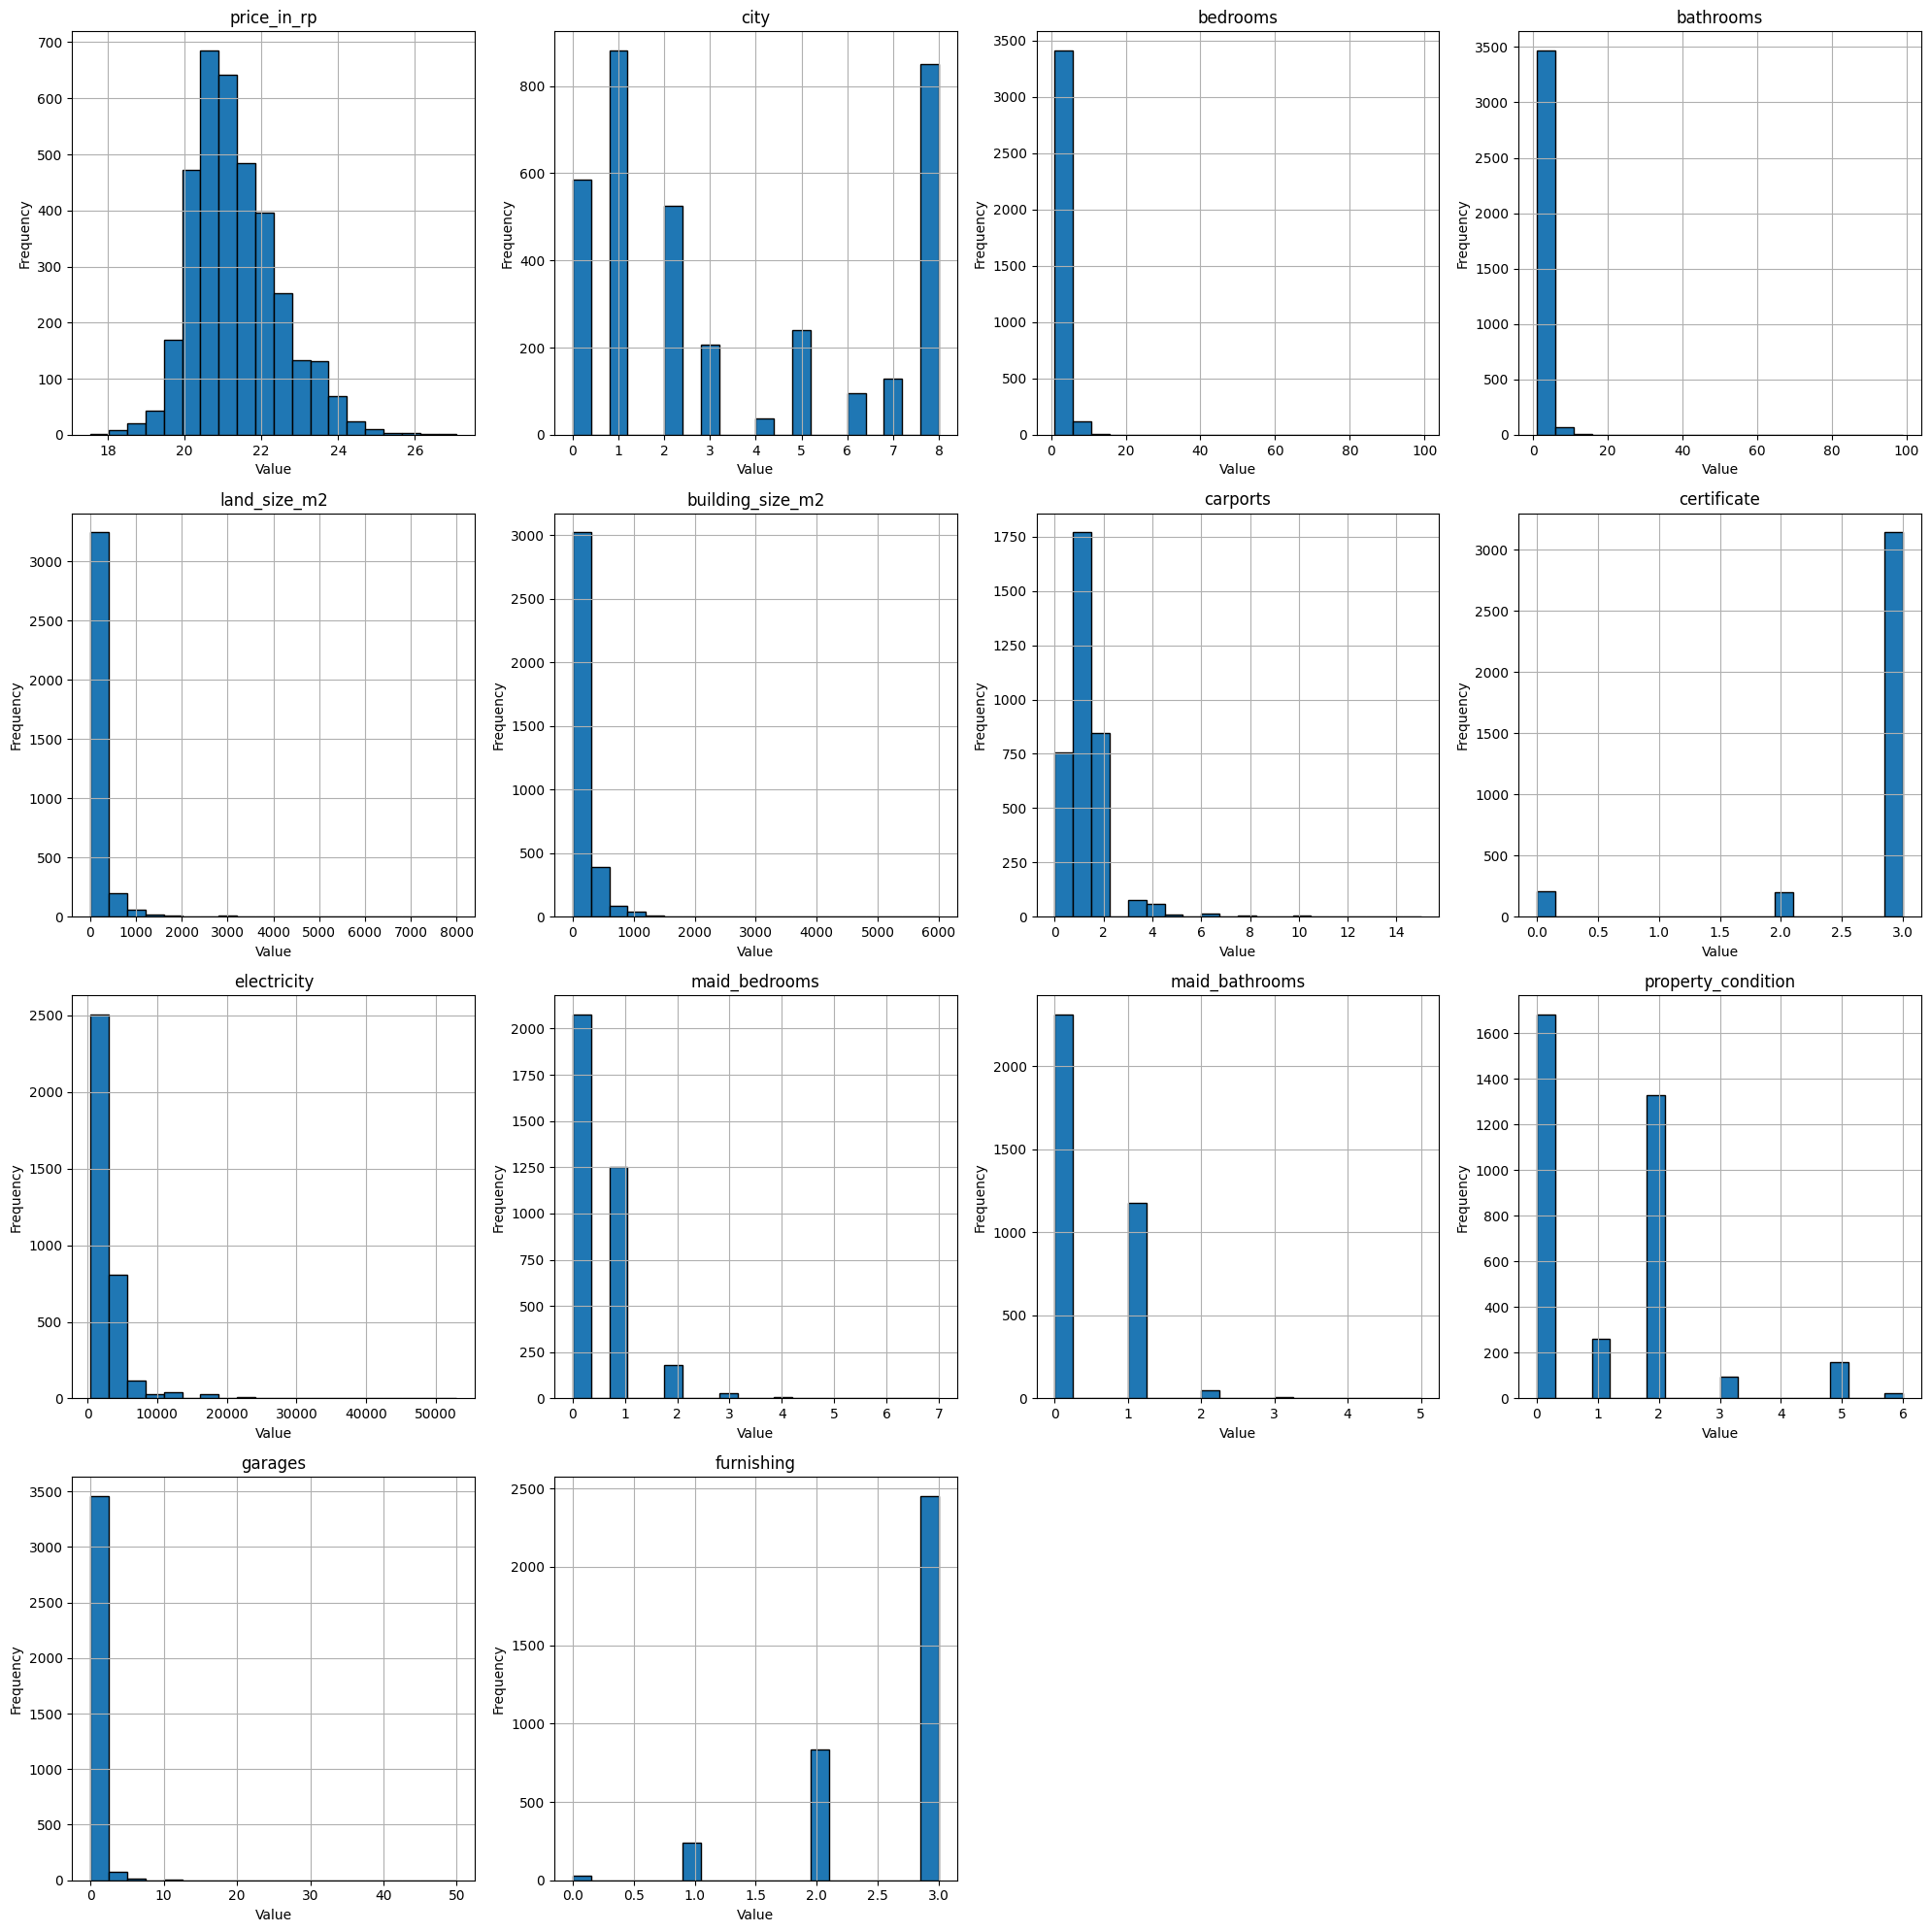

In [23]:
num_var = df.shape[1]

# Menentukan jumlah baris dan kolom untuk grid subplot
n_cols = 4
n_rows = -(-num_var // n_cols)

# Membuat subplot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))

# Flatten axes array untuk memudahkan iterasi jika diperlukan
axes = axes.flatten()

# Plot setiap variabel
for i, column in enumerate(df.columns):
  df[column].hist(ax=axes[i], bins=20, edgecolor='black')
  axes[i].set_title(column)
  axes[i].set_xlabel('Value')
  axes[i].set_ylabel('Frequency')

# Menghapus subplot yang tidak terpakai
for j in range(i + 1, n_rows * n_cols):
  fig.delaxes(axes[j])

# Menampilkan plot
plt.tight_layout()
plt.show()

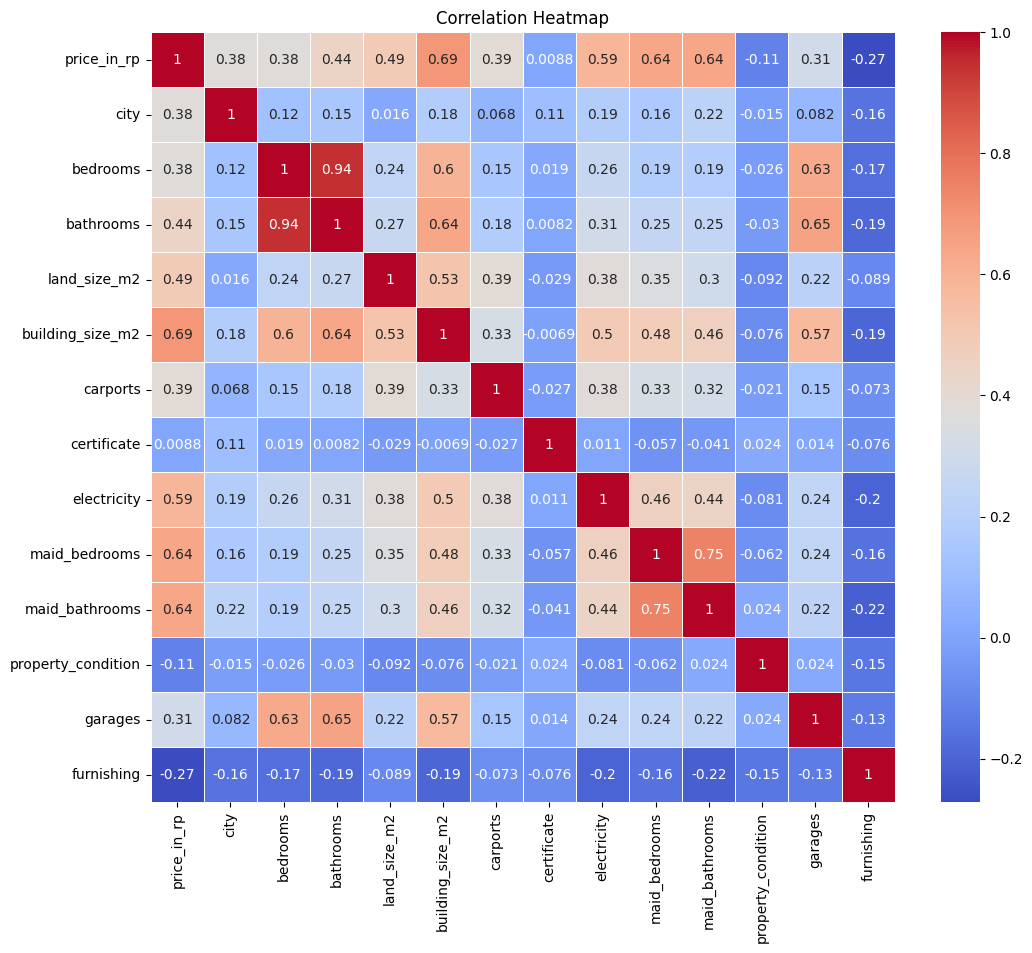

In [24]:
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

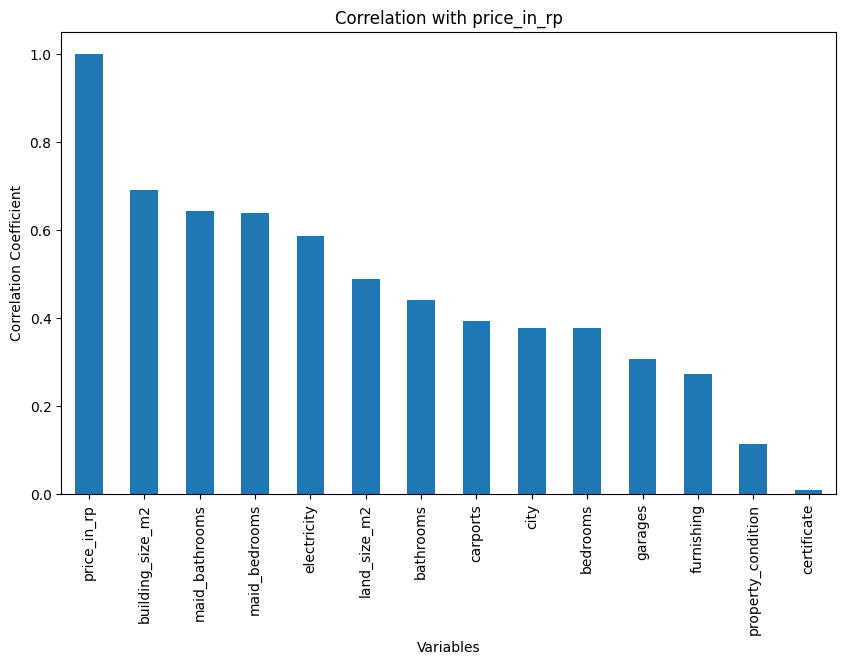

In [25]:
# Menghitung korelasi antara variabel target dan semua variabel lainnya
target_corr = df.corr()['price_in_rp']

# (Opsional) Mengurutkan hasil korelasi berdasarkan korelasi
target_corr_sorted = target_corr.abs().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
target_corr_sorted.plot(kind='bar')
plt.title(f'Correlation with price_in_rp')
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient')
plt.show()

# Data Splitting

In [26]:
df.head()

,price_in_rp,city,bedrooms,bathrooms,land_size_m2,building_size_m2,carports,certificate,electricity,maid_bedrooms,maid_bathrooms,property_condition,garages,furnishing
0,21.818539,0,4.0,4.0,239.0,272.0,0.0,3,4400.0,0.0,1.0,0,0.0,3
1,20.962283,0,3.0,2.0,55.0,69.0,1.0,0,2200.0,0.0,0.0,0,0.0,3
2,21.391095,0,3.0,3.0,119.0,131.0,1.0,0,2200.0,1.0,1.0,0,1.0,3
3,21.917188,0,3.0,3.0,180.0,174.0,0.0,3,3500.0,1.0,1.0,1,2.0,3
4,22.227343,0,4.0,3.0,328.0,196.0,2.0,3,3500.0,1.0,1.0,0,1.0,3


In [27]:
X = df.drop(columns=['price_in_rp'])
y = df['price_in_rp']

In [28]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# menghitung panjang/jumlah data
print("Jumlah data: ",len(X))
# menghitung panjang/jumlah data pada x_train
print("Jumlah data latih: ",len(x_train))
# menghitung panjang/jumlah data pada x_test
print("Jumlah data test: ",len(x_test))

Jumlah data:  3553
Jumlah data latih:  2842
Jumlah data test:  711


# Modeling

In [30]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train XGBoost Regressor
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(x_train, y_train)

# Initialize and train Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(x_train, y_train)

print("XGBoost model training complete.")
print("Random Forest model training complete.")

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Evaluate XGBoost model
y_pred_xgb = xgb_model.predict(x_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse_xgb}")
print(f"Mean Absolute Error (MAE): {mae_xgb}")
print(f"R-squared (R2): {r2_xgb}")
print("-" * 30)

# Evaluate Random Forest model
y_pred_rf = rf_model.predict(x_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse_rf}")
print(f"Mean Absolute Error (MAE): {mae_rf}")
print(f"R-squared (R2): {r2_rf}")

XGBoost Model Evaluation:
Mean Squared Error (MSE): 0.11054764638257941
Mean Absolute Error (MAE): 0.20426883650286096
R-squared (R2): 0.9112129536299578
------------------------------
Random Forest Model Evaluation:
Mean Squared Error (MSE): 0.11803361146583012
Mean Absolute Error (MAE): 0.2012001737656845
R-squared (R2): 0.9052005530884676


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Asumsi y_test = y_log (dari split lo), y_pred_xgb = model.predict(x_test)
# Inverse ke Rp asli
y_test_orig = np.expm1(y_test)  # Balik test set
y_pred_xgb_orig = np.expm1(y_pred_xgb)  # Balik prediksi XGBoost
y_pred_rf_orig = np.expm1(y_pred_rf)    # Balik RF

# Evaluasi XGBoost di Rp asli
mse_xgb_orig = mean_squared_error(y_test_orig, y_pred_xgb_orig)
mae_xgb_orig = mean_absolute_error(y_test_orig, y_pred_xgb_orig)
r2_xgb_orig = r2_score(y_test_orig, y_pred_xgb_orig)

print("XGBoost Evaluasi di Rp Asli:")
print(f"MSE: {mse_xgb_orig:.2e}")
print(f"MAE: {mae_xgb_orig / 1e9:.2f} Miliar Rp")  # Lebih mudah dibaca
print(f"R²: {r2_xgb_orig:.4f}")
print("-" * 30)

# Evaluasi RF di Rp asli
mse_rf_orig = mean_squared_error(y_test_orig, y_pred_rf_orig)
mae_rf_orig = mean_absolute_error(y_test_orig, y_pred_rf_orig)
r2_rf_orig = r2_score(y_test_orig, y_pred_rf_orig)

print("Random Forest Evaluasi di Rp Asli:")
print(f"MSE: {mse_rf_orig:.2e}")
print(f"MAE: {mae_rf_orig / 1e9:.2f} Miliar Rp")
print(f"R²: {r2_rf_orig:.4f}")

XGBoost Evaluasi di Rp Asli:
MSE: 3.13e+19
MAE: 1.34 Miliar Rp
R²: 0.5715
------------------------------
Random Forest Evaluasi di Rp Asli:
MSE: 3.30e+19
MAE: 1.40 Miliar Rp
R²: 0.5477


In [ ]:
# Install & import (kalau belum)
!pip install streamlit joblib pyngrok -q
import joblib
import numpy as np
from sklearn.model_selection import train_test_split

# Save model XGBoost (asumsi xgb_model udah ada dari tuning lo)
joblib.dump(xgb_model, 'xgb_house_model.pkl')
print("Model saved: xgb_house_model.pkl")

# Generate requirements.txt
with open('requirements.txt', 'w') as f:
    f.write('streamlit==1.29.0\nxgboost==2.0.0\npandas==2.0.3\nnumpy==1.24.3\njoblib==1.3.2')
print("requirements.txt generated!")

# Generate app.py (full script dengan inverse log, input features standar)
feature_names = ['city', 'bedrooms', 'bathrooms', 'land_size_m2', 'building_size_m2',
                 'carports', 'certificate', 'electricity', 'maid_bedrooms',
                 'maid_bathrooms', 'property_condition', 'garages', 'furnishing'] # Adjust ke X.columns lo kalau beda

app_code = f'''
import streamlit as st
import pandas as pd
import numpy as np
import joblib

# Load model
@st.cache_resource
def load_model():
    return joblib.load('xgb_house_model.pkl')

model = load_model()

st.title("🏠 Prediksi Harga Rumah Jabodetabek")
st.markdown("Input spesifikasi rumah untuk estimasi harga (Rp). Model: XGBoost (R² 0.91 log-scale, MAE ~1.34 Miliar Rp).") # Update MAE

# Sidebar input (adjust slider berdasarkan features lo)
st.sidebar.header("Input Spesifikasi Rumah")
inputs = {{
    'city': st.sidebar.selectbox("Kota (0: Bekasi, 1: Bogor, 2: Depok, 3: Jakarta Barat, 4: Jakarta Pusat, 5: Jakarta Selatan, 6: Jakarta Timur, 7: Jakarta Utara, 8: Tangerang)", range(9), 8),
    'bedrooms': st.sidebar.slider("Jumlah Kamar Tidur", 1.0, 10.0, 3.0),
    'bathrooms': st.sidebar.slider("Jumlah Kamar Mandi", 1.0, 10.0, 2.0),
    'land_size_m2': st.sidebar.slider("Luas Tanah (m²)", 12.0, 8000.0, 100.0),
    'building_size_m2': st.sidebar.slider("Luas Bangunan (m²)", 1.0, 6000.0, 120.0),
    'carports': st.sidebar.slider("Carport", 0.0, 15.0, 1.0),
    'certificate': st.sidebar.selectbox("Sertifikat (0: HGB, 1: Lainnya, 2: SHGB, 3: SHM)", range(4), 3),
    'electricity': st.sidebar.slider("Daya Listrik (VA)", 450.0, 53000.0, 2200.0),
    'maid_bedrooms': st.sidebar.slider("Jumlah Kamar Tidur Pembantu", 0.0, 7.0, 0.0),
    'maid_bathrooms': st.sidebar.slider("Jumlah Kamar Mandi Pembantu", 0.0, 5.0, 0.0),
    'property_condition': st.sidebar.selectbox("Kondisi Properti (0: bagus, 1: bagus sekali, 2: baru, 3: perlu renovasi, 4: siap huni, 5: terawat, 6: unfinish)", range(7), 0),
    'garages': st.sidebar.slider("Garasi", 0.0, 50.0, 1.0),
    'furnishing': st.sidebar.selectbox("Furnishing (0: furnished, 1: semi furnished, 2: unfurnished)", range(3), 2)
}}

# Buat input DataFrame (urutan sesuai feature_names)
input_df = pd.DataFrame([inputs])[feature_names]  # Pastiin urutan match X.columns

if st.button("🔮 Prediksi Harga"):
    # Prediksi di log-scale
    y_pred_log = model.predict(input_df)[0]
    # Inverse ke Rp asli
    y_pred_rp = np.expm1(y_pred_log)

    st.success(f"**Prediksi Harga: Rp {y_pred_rp:,.0f}**")
    st.info(f"Estimasi Rentang: Rp {y_pred_rp * 0.8:,.0f} - Rp {y_pred_rp * 1.2:,.0f} (error ~20% berdasarkan MAPE model)") # Adjust error info

    # Plot feature importance
    st.subheader("Faktor Pengaruh Harga:")
    importance = pd.DataFrame({{'Feature': feature_names, 'Importance': model.feature_importances_}}).sort_values('Importance', ascending=False)
    st.bar_chart(importance.set_index('Feature'))

st.markdown("---\\nModel berdasarkan data Rumah123 Jabodetabek. Update 2025. By Grok.")
'''

with open('app.py', 'w') as f:
    f.write(app_code)
print("app.py generated! Files ready: app.py, xgb_house_model.pkl, requirements.txt")

Model saved: xgb_house_model.pkl
requirements.txt generated!


NameError: name 'y_pred_rp' is not defined